<center><h1>Ali_Hanan_HW8</h1></center>

Name: Hanan Ali
<br>
Github Username: hananali2023
<br>
USC ID: 1782313333

## 1. Supervised, Semi-Supervised, and Unsupervised Learning

Import packages

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn.cluster import KMeans
from sklearn.cluster import SpectralClustering
from sklearn.metrics import DistanceMetric
from sklearn.preprocessing import MinMaxScaler



import warnings
warnings.filterwarnings("ignore")



### (a) Download the Breast Cancer Wisconsin (Diagnostic) Data Set

In [11]:
headers = ["ID", "Diagnosis", "Mean Radius", "Mean Texture", "Mean Perimeter", "Mean Area", "Mean Smoothness", "Mean Compactness", "Mean Concavity", "Mean Concave Points", "Mean Symmetry", "Mean Fractal Dimension", "Radius SE", "Texture SE", "Perimeter SE", "Area SE",
          "Smoothness SE", "Compactness SE", "Concavity SE", "Concave Points SE", "Symmetry SE", "Fractal Dimension SE", "Worst Radius", "Worst Texture", "Worst Perimeter", "Worst Area", "Worst Smoothness", "Worst Compactness", "Worst Concavity", "Worst Concave Points",
          "Worst Symmetry", "Worst Fractal Dimension"]
data = pd.read_csv("../data/wdbc.csv", names=headers)
data.head()

,ID,Diagnosis,Mean Radius,Mean Texture,Mean Perimeter,Mean Area,Mean Smoothness,Mean Compactness,Mean Concavity,Mean Concave Points,...,Worst Radius,Worst Texture,Worst Perimeter,Worst Area,Worst Smoothness,Worst Compactness,Worst Concavity,Worst Concave Points,Worst Symmetry,Worst Fractal Dimension
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [12]:
data['Diagnosis'] = data['Diagnosis'].replace({'B': 1, 'M': 0})




X = data.drop(columns=['Diagnosis', 'ID']).values
y = data['Diagnosis'].values

### (b) Monte-Carlo Simulation

#### (i) Supervised Learning

In [13]:
train_accuracy=[]
train_precision=[]
train_recall=[]
train_f1=[]
train_auc=[]

test_accuracy=[]
test_precision=[]
test_recall=[]
test_f1=[]
test_auc=[]


for x in range(30):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)
    
    pipeline=make_pipeline(StandardScaler(), GridSearchCV(LinearSVC(penalty='l1', dual=False), param_grid={'C': [0.01, 0.1, 1, 10, 100]}, cv=5, scoring='accuracy', error_score='raise'))

    pipeline.fit(X_train, y_train)
    
    
    y_train_predicted=pipeline.predict(X_train)
    y_test_predicted=pipeline.predict(X_test)
    
    train_accuracy.append(accuracy_score(y_train, y_train_predicted))
    train_precision.append(precision_score(y_train, y_train_predicted))
    train_recall.append(recall_score(y_train, y_train_predicted))
    train_f1.append(f1_score(y_train, y_train_predicted))
    train_auc.append(roc_auc_score(y_train, y_train_predicted))
    
    test_accuracy.append(accuracy_score(y_test, y_test_predicted))
    test_precision.append(precision_score(y_test, y_test_predicted))
    test_recall.append(recall_score(y_test, y_test_predicted))
    test_f1.append(f1_score(y_test, y_test_predicted))
    test_auc.append(roc_auc_score(y_test, y_test_predicted))
    
    
avg_train_accuracy = np.mean(train_accuracy)
avg_train_precision = np.mean(train_precision)
avg_train_recall = np.mean(train_recall)
avg_train_f1 = np.mean(train_f1)
avg_train_auc = np.mean(train_auc)

avg_test_accuracy = np.mean(test_accuracy)
avg_test_precision = np.mean(test_precision)
avg_test_recall = np.mean(test_recall)
avg_test_f1 = np.mean(test_f1)
avg_test_auc = np.mean(test_auc)

supervised = pd.DataFrame({
    'Metric': ['Train Accuracy', 'Train Precision', 'Train Recall', 'Train F1 Score', 'Train AUC',
               'Test Accuracy', 'Test Precision', 'Test Recall', 'Test F1 Score', 'Test AUC'],
    'Average': [avg_train_accuracy, avg_train_precision, avg_train_recall, avg_train_f1, avg_train_auc,
                avg_test_accuracy, avg_test_precision, avg_test_recall, avg_test_f1, avg_test_auc]
})


supervised




,Metric,Average
0,Train Accuracy,0.985934
1,Train Precision,0.982357
2,Train Recall,0.995439
3,Train F1 Score,0.988848
4,Train AUC,0.982719
5,Test Accuracy,0.972222
6,Test Precision,0.971582
7,Test Recall,0.985185
8,Test F1 Score,0.978207
9,Test AUC,0.967593


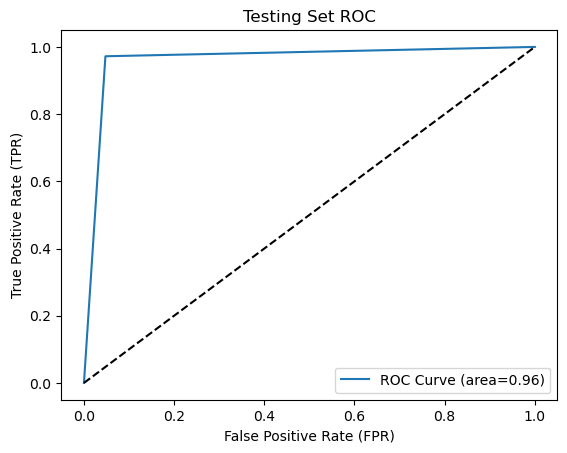

In [14]:
#Test ROC
fpr, tpr, _ = roc_curve(y_test, y_test_predicted)
plt.figure()
plt.plot(fpr, tpr, label='ROC Curve (area=%0.2f)' %roc_auc_score(y_test, y_test_predicted))
plt.plot([0,1],[0,1], 'k--')
plt.title("Testing Set ROC")
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel("True Positive Rate (TPR)")
plt.legend(loc="lower right")
plt.show()

In [15]:
# Test Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_test_predicted)
print('Test Confusion Matrix:\n', conf_matrix)

Test Confusion Matrix:
 [[40  2]
 [ 2 70]]


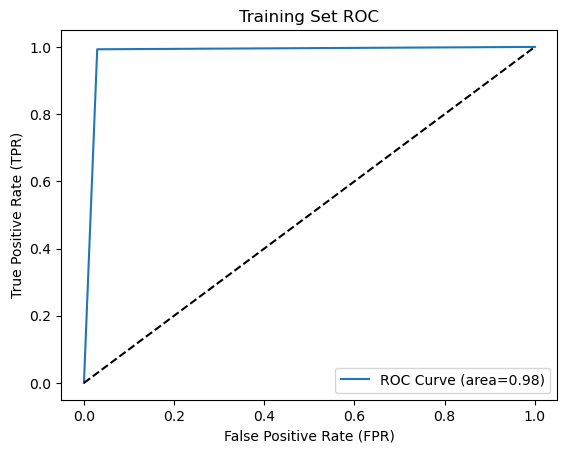

In [16]:
#Train ROC
fpr, tpr, _ = roc_curve(y_train, y_train_predicted)
plt.figure()
plt.plot(fpr, tpr, label='ROC Curve (area=%0.2f)' %roc_auc_score(y_train, y_train_predicted))
plt.plot([0,1],[0,1], 'k--')
plt.title("Training Set ROC")
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel("True Positive Rate (TPR)")
plt.legend(loc="lower right")
plt.show()

In [17]:
# Train Confusion Matrix
conf_matrix = confusion_matrix(y_train, y_train_predicted)
print('Train Confusion Matrix:\n', conf_matrix)

Train Confusion Matrix:
 [[165   5]
 [  2 283]]


#### (ii) Semi-Supervised Learning/ Self-training

In [18]:
labeled_X = []
labeled_y = []
unlabeled_X = []
unlabeled_y = []


for i in range(30):
    for label in np.unique(y_train):
        X_data = X_train[y_train == label]
        y_data = y_train[y_train == label]

        X_data_labeled, X_data_unlabeled, y_data_labeled, y_data_unlabeled = train_test_split(X_data, y_data, test_size=0.5)

        labeled_X.append(X_data_labeled)
        labeled_y.append(y_data_labeled)
        unlabeled_X.append(X_data_unlabeled)
        unlabeled_y.append(y_data_unlabeled)

labeled_X = np.concatenate(labeled_X)
labeled_y = np.concatenate(labeled_y)
unlabeled_X = np.concatenate(unlabeled_X)
unlabeled_y = np.concatenate(unlabeled_y)



##### (A)

In [19]:
train_accuracy1 = []
train_precision1 = []
train_recall1 = []
train_1f1 = []
train_auc1 = []

test_accuracy1 = []
test_precision1 = []
test_recall1 = []
test_1f1 = []
test_auc1 = []

In [20]:


param_grid = {'C': [0.1, 1, 10]}

svm = SVC(kernel='linear')

grid_searchcv = GridSearchCV(svm, param_grid, cv=5)

grid_searchcv.fit(labeled_X, labeled_y)

svm_best = grid_searchcv.best_estimator_

##### (B)

In [ ]:

while len(unlabeled_X) > 0:
    dist = svm_best.decision_function(unlabeled_X)
    farthest = np.argmax(np.abs(dist))
        
    predict = svm_best.predict(unlabeled_X[farthest].reshape(1, -1))

    labeled_X = np.concatenate((labeled_X, unlabeled_X[farthest].reshape(1, -1)))
    labeled_y = np.concatenate((labeled_y, predict))

    unlabeled_X = np.delete(unlabeled_X, farthest, axis=0)
        #unlabeled_y = np.delete(unlabeled_y, farthest)


    svm_best.fit(labeled_X, labeled_y)
        
print("Iteration:", i+1)


In [ ]:
#Labeled Train

y_train_predicted = svm.predict(labeled_X)

train_accuracy1 = accuracy_score(labeled_y, y_train_predicted)
train_precision1 = precision_score(labeled_y, y_train_predicted)
train_recall1 = recall_score(labeled_y, y_train_predicted)
train_1f1 = f1_score(labeled_y, y_train_predicted)
train_auc1 = roc_auc_score(labeled_y, y_train_predicted)


In [ ]:
#Test

y_test_predicted = svm.predict(X_test)

test_accuracy1 = accuracy_score(y_test, y_test_predicted)
test_precision1 = precision_score(y_test, y_test_predicted)
test_recall1 = recall_score(y_test, y_test_predicted)
test_1f1 = f1_score(y_test, y_test_predicted)
test_auc1 = roc_auc_score(y_test, y_test_predicted)


#### (iii) Unsupervised Learning

##### (A)

In [22]:
train_accuracy2 = []
train_precision2 = []
train_recall2 = []
train_2f1 = []
train_auc2 = []

test_accuracy2 = []
test_precision2 = []
test_recall2 = []
test_2f1 = []
test_auc2 = []

for i in range(30):

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

    kmeans = KMeans(n_clusters=2, init='random')
    kmeans.fit(X_train)


##### (B)

In [23]:
for i in range(30):

    center = kmeans.cluster_centers_

    closest = []
    
    for c in center:
        dist = np.linalg.norm(X_train - c, axis = 1)
        closest.append(np.argsort(dist)[:30])

    closest_point = [y_train[label] for label in closest]

    pred_point = [np.bincount(points).argmax() for points in closest_point]

    test_points = np.linalg.norm(X_test[:, np.newaxis, :] - c, axis = 2)

    pred_cluster = np.argmin(test_points, axis = 1)

    test_predicted_label = [pred_point[cluster] for cluster in pred_cluster]
    
    accuracy2 = accuracy_score(y_test, test_predicted_label)
    precision2 = precision_score(y_test, test_predicted_label)
    recall2 = recall_score(y_test, test_predicted_label)
    f1_2 = f1_score(y_test, test_predicted_label)
    auc2 = roc_auc_score(y_test, test_predicted_label)
    conf_matrix = confusion_matrix(y_test, test_predicted_label)
    
    test_accuracy2.append(accuracy2)
    test_precision2.append(precision2)
    test_recall2.append(recall2)
    test_2f1.append(f1_2)
    test_auc2.append(auc2)
    
    
avg_accuracy2 = np.mean(test_accuracy2)
avg_precision2 = np.mean(test_precision2)
avg_recall2 = np.mean(test_recall2)
avg_2f1 = np.mean(test_2f1)
avg_auc2 = np.mean(test_auc2)

unsupervised = pd.DataFrame({
    'Metric': ['Test Accuracy', 'Test Precision', 'Test Recall', 'Test F1 Score', 'Test AUC'],
    'Average': [avg_accuracy2, avg_precision2, avg_recall2, avg_2f1, avg_auc2]
})
    
unsupervised


,Metric,Average
0,Test Accuracy,0.368421
1,Test Precision,0.000000
2,Test Recall,0.000000
3,Test F1 Score,0.000000
4,Test AUC,0.500000


#### (iv) Spectral Clustering

In [24]:
#Balance clusters

def balanced_cluster(y_train, label):
    count = np.bincount(label)
    min_class = np.argmin(count)
    maj_class = 1 - min_class
    label[y_train == maj_class] = count[min_class]
    label[y_train == min_class] = count[min_class]
    
    
test_accuracy3 = []
test_precision3 = []
test_recall3 = []
test_3f1 = []
test_auc3 = []

In [25]:
for i in range (30):
    
    spec_clusters = SpectralClustering(n_clusters=2, affinity='rbf', gamma=1)
    labels = spec_clusters.fit_predict(X_train)
    
    balanced_cluster(y_train, labels)

    test_predicted_label = spec_clusters.fit_predict(X_test)
    
    accuracy3 = accuracy_score(y_test, test_predicted_label)
    precision3 = precision_score(y_test, test_predicted_label)
    recall3 = recall_score(y_test, test_predicted_label)
    f1_3 = f1_score(y_test, test_predicted_label)
    auc3 = roc_auc_score(y_test, test_predicted_label)
    
    test_accuracy3.append(accuracy3)
    test_precision3.append(precision3)
    test_recall3.append(recall3)
    test_3f1.append(f1_3)
    test_auc3.append(auc3)
    
avg_accuracy3 = np.mean(test_accuracy3)
avg_precision3 = np.mean(test_precision3)
avg_recall3 = np.mean(test_recall3)
avg_3f1 = np.mean(test_3f1)
avg_auc3 = np.mean(test_auc3)

spectral = pd.DataFrame({
    'Metric': ['Test Accuracy', 'Test Precision', 'Test Recall', 'Test F1 Score', 'Test AUC'],
    'Average': [avg_accuracy3, avg_precision3, avg_recall3, avg_3f1, avg_auc3]
})
    
spectral
    
    

,Metric,Average
0,Test Accuracy,0.377193
1,Test Precision,0.154464
2,Test Recall,0.036574
3,Test F1 Score,0.032932
4,Test AUC,0.498843


#### (iv) Compare

In [26]:
compare = spectral.iloc[:, 1].compare(unsupervised.iloc[:, 1], result_names=('Spectral Clustering', 'Unsupervised'))

compare.insert(0, "Metrics", ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC'], True )

compare

,Metrics,Spectral Clustering,Unsupervised
0,Accuracy,0.377193,0.368421
1,Precision,0.154464,0.000000
2,Recall,0.036574,0.000000
3,F1 Score,0.032932,0.000000
4,AUC,0.498843,0.500000


## 2. Active Learning Using Support Vector Machines

### (a) Download the banknote authentication Data Set

In [27]:
data = pd.read_csv('../data/data_banknote_authentication.txt', header=None)
data.head()

,0,1,2,3,4
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [28]:
X = data.drop(columns=[4]).values
y = data[4].values


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=472, random_state=42)


### (b) Repeat each of the following two procedures 50 times

#### (i) Passive

In [ ]:
passive_test_errors = []
select_points = []

param_grid = {'C': [0.1, 1, 10]}

for iteration in range(50):
    points = []
    selected_y = []
    
    
    for n_points in range(10, 901, 10):
        selected = np.random.choice(len(X_train), size = 10, replace=False)
        data_points = X_train[selected]
        selected_labels = y_train[selected]
        
        points.extend(data_points)
        selected_y.extend(selected_labels)
        select_points.append(len(points))
        
        svm=GridSearchCV(LinearSVC(penalty = 'l1', dual = False), param_grid, cv=5)
        #print("points:", len(points))
        #print("y_train:",len(selected_y))
        svm.fit(points, selected_y)
        
        test_error = 1 - np.mean(cross_val_score(svm, X_test, y_test, cv=5))
        passive_test_errors.append(test_error)
        

        
        
passive_test_error = pd.DataFrame(passive_test_errors, columns=['Test Errors'])
        
passive_test_error

#print(passive_test_errors)

#### (ii) Active

In [40]:
active_test_errors = []
active_select_points = []

param_grid = {'C': [0.1, 1, 10]}

for iteration in range(2):
    active_points = []
    active_selected_y = []

    for n_points in range(10, 901, 10):
        active_selected = np.random.choice(len(X_train), size = 10, replace=False)
        active_data_points = X_train[active_selected]
        active_selected_labels = y_train[active_selected]
        
        #print("Active_points:", len(active_points))
        #print("Active_selected_y:", len(active_selected_y))
        
        active_points.extend(active_data_points)
        active_selected_y.extend(active_selected_labels)
        active_select_points.append(len(active_points))
        
        #print("Active_points:", len(active_points))
        #print("Active_selected_y:", len(active_selected_y))

        
        active_svm=GridSearchCV(LinearSVC(penalty = 'l1', dual = False), param_grid, cv=5)


        active_svm.fit(active_points, active_selected_y)
        
        best_estimator=active_svm.best_estimator_
        active_hyperplane=best_estimator.coef_.flatten()
        distance = np.abs(best_estimator.decision_function(X_train))
        active_sorted=np.argsort(distance)
        
        closest_points=active_sorted[:10]
        closest_data_points=X_train[closest_points]
        
        active_points.extend(closest_data_points)
        active_svm.fit(active_points, active_selected_y)
        
        active_test_error = 1 - np.mean(cross_val_score(active_svm, X_test, y_test, cv=5))
        active_test_errors.append(active_test_error)

        
active_test_error = pd.DataFrame(active_test_errors, columns=['Test Errors'])
        
active_test_error


Active_points: 0
Active_selected_y: 0
Active_points: 10
Active_selected_y: 10


ValueError: Found input variables with inconsistent numbers of samples: [20, 10]

### (c) Average the 50 test errors

In [48]:
passive_test_errors = np.array(passive_test_errors)
active_test_errors = np.array(active_test_errors)

passive_test_errors = passive_test_errors.reshape((90, 50))
active_test_errors = active_test_errors.reshape((90, 50))

passive_avg_errors = np.mean(passive_test_errors, axis=1)
active_avg_errors = np.mean(active_test_errors, axis=1)

passive_avg = np.mean(passive_avg_errors)
active_avg = np.mean(active_avg_errors)

test_errors = pd.DataFrame({
    'Instances': range(10, 901, 10),
    'Passive Average Test Error': passive_avg_errors,
    'Active Average Test Error': active_avg_errors})


ValueError: cannot reshape array of size 180 into shape (90,50)

#### References

- LinearSVC: https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html
- GridSearchCV: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
- make_pipeline: https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.make_pipeline.html
- ROC Plot: https://scikit-learn.org/1.1/auto_examples/model_selection/plot_roc.html
- KMeans: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
- SpectralClustering: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.SpectralClustering.html


